<a href="https://colab.research.google.com/github/Arham-Aryan/MetaVerse/blob/main/Classifications_of_Metaverse_Financial_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
# Load the data
data = pd.read_csv('metaverse_transactions_dataset.csv')

In [ ]:
data

,timestamp,hour_of_day,sending_address,receiving_address,amount,transaction_type,location_region,ip_prefix,login_frequency,session_duration,purchase_pattern,age_group,risk_score,anomaly
0,2022-04-11 12:47:27,12,0x9d32d0bf2c00f41ce7ca01b66e174cc4dcb0c1da,0x39f82e1c09bc6d7baccc1e79e5621ff812f50572,796.949206,transfer,Europe,192.000,3,48,focused,established,18.7500,low_risk
1,2022-06-14 19:12:46,19,0xd6e251c23cbf52dbd472f079147873e655d8096f,0x51e8fbe24f124e0e30a614e14401b9bbfed5384c,0.010000,purchase,South America,172.000,5,61,focused,established,25.0000,low_risk
2,2022-01-18 16:26:59,16,0x2e0925b922fed01f6a85d213ae2718f54b8ca305,0x52c7911879f783d590af45bda0c0ef2b8536706f,778.197390,purchase,Asia,192.168,3,74,focused,established,31.2500,low_risk
3,2022-06-15 09:20:04,9,0x93efefc25fcaf31d7695f28018d7a11ece55457f,0x8ac3b7bd531b3a833032f07d4e47c7af6ea7bace,300.838358,transfer,South America,172.000,8,111,high_value,veteran,36.7500,low_risk
4,2022-02-18 14:35:30,14,0xad3b8de45d63f5cce28aef9a82cf30c397c6ceb9,0x6fdc047c2391615b3facd79b4588c7e9106e49f2,775.569344,sale,Africa,172.160,6,100,high_value,veteran,62.5000,moderate_risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78595,2022-02-13 12:52:27,12,0xa99b9a7f5c5dd37429771efd3b93c6fbe1ab2936,0x5a78c88c5fc1e9b512f6c64e266b46a9db0a7238,660.280373,transfer,Africa,172.000,1,27,random,new,26.2500,low_risk
78596,2022-02-16 16:15:29,16,0xcca095ad2d508c200bda1141f783d77c3e6cbb08,0xb71a4df291ea8e9996a74e77ab63f5abcbfe90f5,310.273397,purchase,Africa,172.000,5,60,focused,established,26.2500,low_risk
78597,2022-08-04 16:06:42,16,0xe0b340171486b08f0c1f4ac607ed776478cefd2b,0x577754308538f4be10a41afb4f8900cd24d7098f,624.674332,purchase,Africa,192.000,1,34,random,new,36.7500,low_risk
78598,2022-02-26 04:06:08,4,0xb0b2f6fc707fbb7f9d27a9f4fe0cb0d6b39a0155,0xd6ba299fdd52f09f01d9648036ca446498c01ac2,401.391592,purchase,Asia,192.168,4,56,focused,established,35.4375,low_risk


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78600 entries, 0 to 78599
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          78600 non-null  object 
 1   hour_of_day        78600 non-null  int64  
 2   sending_address    78600 non-null  object 
 3   receiving_address  78600 non-null  object 
 4   amount             78600 non-null  float64
 5   transaction_type   78600 non-null  object 
 6   location_region    78600 non-null  object 
 7   ip_prefix          78600 non-null  float64
 8   login_frequency    78600 non-null  int64  
 9   session_duration   78600 non-null  int64  
 10  purchase_pattern   78600 non-null  object 
 11  age_group          78600 non-null  object 
 12  risk_score         78600 non-null  float64
 13  anomaly            78600 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 8.4+ MB


In [ ]:
data.describe()

,hour_of_day,amount,ip_prefix,login_frequency,session_duration,risk_score
count,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000,78600.000000
mean,11.532634,502.574903,147.644430,4.178702,69.684606,44.956722
std,6.935897,245.898146,69.388143,2.366038,40.524476,21.775365
min,0.000000,0.010000,10.000000,1.000000,20.000000,15.000000
25%,6.000000,331.319966,172.000000,2.000000,35.000000,26.250000
50%,12.000000,500.029500,172.160000,4.000000,60.000000,40.000000
75%,18.000000,669.528311,192.000000,6.000000,100.000000,52.500000
max,23.000000,1557.150905,192.168000,8.000000,159.000000,100.000000


In [ ]:
data.isna().sum()

timestamp            0
hour_of_day          0
sending_address      0
receiving_address    0
amount               0
transaction_type     0
location_region      0
ip_prefix            0
login_frequency      0
session_duration     0
purchase_pattern     0
age_group            0
risk_score           0
anomaly              0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
num_cols = data.select_dtypes(include='number').columns
cat_cols = data.select_dtypes(include='object').columns

<Axes: >

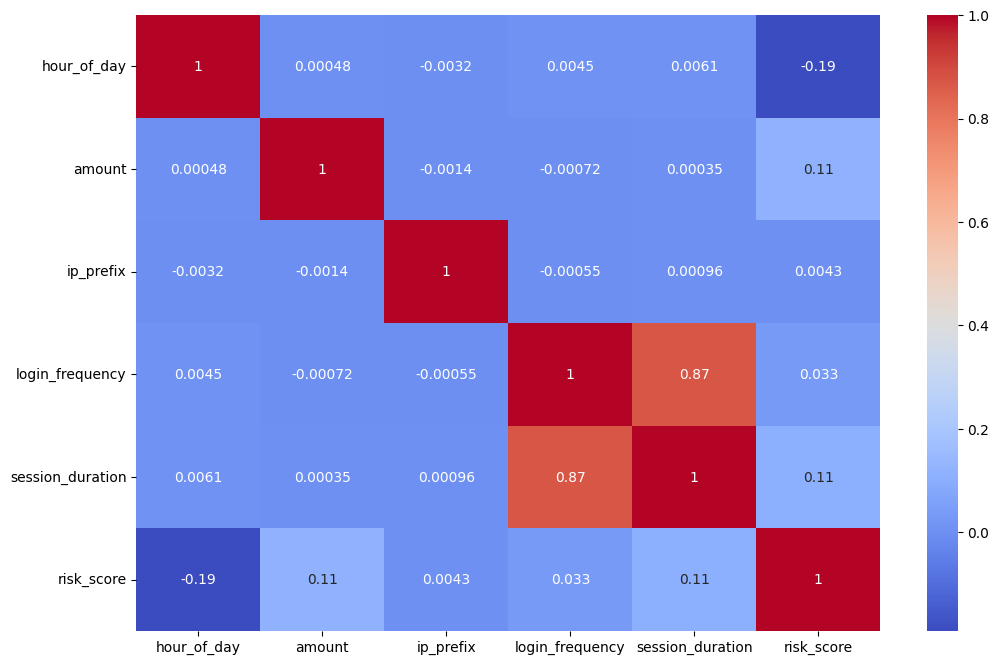

In [ ]:
corr = data[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='coolwarm', annot=True)

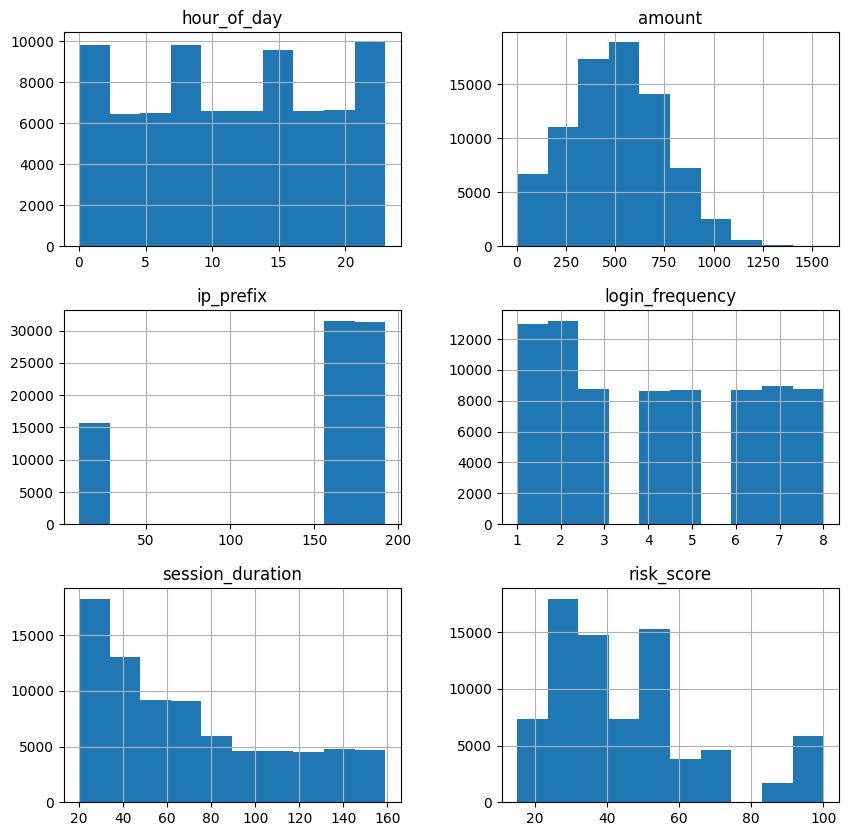

In [ ]:
data.hist(figsize=(10, 10))
plt.show()

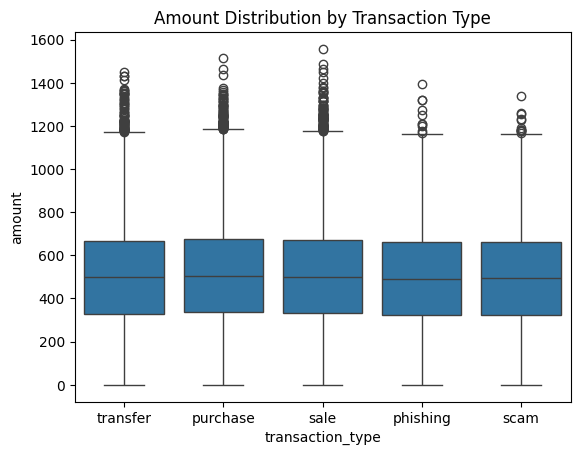

In [ ]:
# Box plot of amount by transaction type
sns.boxplot(x='transaction_type', y='amount', data=data)
plt.title('Amount Distribution by Transaction Type')
plt.show()

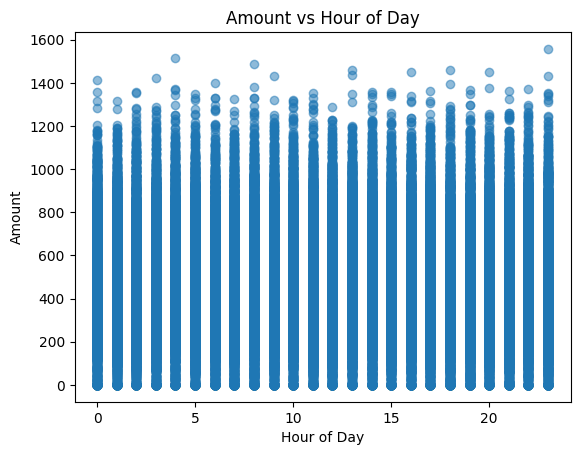

In [ ]:
# Scatter plot of amount vs hour_of_day
plt.scatter(data['hour_of_day'], data['amount'], alpha=0.5)
plt.xlabel('Hour of Day')
plt.ylabel('Amount')
plt.title('Amount vs Hour of Day')
plt.show()

In [ ]:
# Risk Assessment
# Define risk levels based on transaction features
def assess_risk(transaction):
    if transaction['transaction_type'] == 'transfer':
        if transaction['amount'] > 500:  # High amount transfers
            return 'high_risk'
        else:
            return 'medium_risk'
    elif transaction['transaction_type'] == 'purchase':
        if transaction['amount'] > 100:  # High amount purchases
            return 'high_risk'
        else:
            return 'low_risk'
    elif transaction['transaction_type'] == 'sale':
        if transaction['amount'] > 1000:  # High amount sales
            return 'high_risk'
        else:
            return 'medium_risk'
    else:
        return 'unknown'

# Apply risk assessment function to each transaction
data['risk_level'] = data.apply(assess_risk, axis=1)

In [ ]:
# Display results
print("Risk Assessment Results:")
print(data['risk_level'].value_counts())

Risk Assessment Results:
medium_risk    35599
high_risk      35133
unknown         6495
low_risk        1373
Name: risk_level, dtype: int64


In [ ]:
# Drop non-numeric columns if necessary or handle them separately
X = data.drop(['sending_address', 'receiving_address', 'transaction_type', 'location_region', 'anomaly'], axis=1)
y = data['anomaly']  # Assuming 'anomaly' is the target variable

In [ ]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define categorical columns
categorical_cols = ['purchase_pattern', 'age_group', 'risk_score']

In [ ]:
# Define preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [ ]:
# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
# Append the model to the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', IsolationForest(contamination=0.05))])

In [ ]:
# Train the model
pipeline.fit(X_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['purchase_pattern',
                                                   'age_group',
                                                   'risk_score'])])),
                ('model', IsolationForest(contamination=0.05))])

In [ ]:
# Predict anomalies
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

In [ ]:
# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train_encoded, y_pred_train)
train_precision = precision_score(y_train_encoded, y_pred_train, average='weighted')  # Choose appropriate average
train_recall = recall_score(y_train_encoded, y_pred_train, average='weighted')  # Choose appropriate average
train_f1 = f1_score(y_train_encoded, y_pred_train, average='weighted')  # Choose appropriate average

test_accuracy = accuracy_score(y_test_encoded, y_pred_test)
test_precision = precision_score(y_test_encoded, y_pred_test, average='weighted')  # Choose appropriate average
test_recall = recall_score(y_test_encoded, y_pred_test, average='weighted')  # Choose appropriate average
test_f1 = f1_score(y_test_encoded, y_pred_test, average='weighted')  # Choose appropriate average

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall

In [ ]:
print("\nAnomaly Detection Results:")
print(data['anomaly'].value_counts())


Anomaly Detection Results:
low_risk         63494
moderate_risk     8611
high_risk         6495
Name: anomaly, dtype: int64


In [ ]:
print("Training Set Metrics:")
print("Accuracy:", train_accuracy)
print("Precision:", train_precision)
print("Recall:", train_recall)
print("F1-score:", train_f1)

print("\nTest Set Metrics:")
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("F1-score:", test_f1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_test))

Training Set Metrics:
Accuracy: 0.7708810432569975
Precision: 0.6431225611015846
Recall: 0.7708810432569975
F1-score: 0.7012301656317098

Test Set Metrics:
Accuracy: 0.7821882951653945
Precision: 0.6625497901031768
Recall: 0.7821882951653945
F1-score: 0.7174154209226862

Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00      1251
           1       0.81      0.96      0.88     12848
           2       0.00      0.00      0.00      1621

    accuracy                           0.78     15720
   macro avg       0.20      0.24      0.22     15720
weighted avg       0.66      0.78      0.72     15720



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [8]:
# One-hot encode categorical features
categorical_cols = ['purchase_pattern', 'age_group', 'risk_score']
X_encoded = pd.get_dummies(X, columns=categorical_cols)



In [9]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [14]:
# Reshape the data for 1D CNN
X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable into numerical format
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert target variable to categorical
num_classes = len(label_encoder.classes_)
y_train_cat = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_cat = to_categorical(y_test_encoded, num_classes=num_classes)



In [16]:
# Build the CNN model
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train_reshaped.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(32, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])